# Лабораторная работа №3

## Лыскова В.Э. М19-ТС

## Вариант №10

In [2]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

### 1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

Информация об атрибуте: (классы: съедобный = e, ядовитый = p)

- форма шляпки: раструб = b, коническая = c, выпуклая = x, плоская = f, с выступом = k, утопленная = s

- поверхность шляпки: волокнистая = f, бороздки = g, чешуйчатая = y, гладкая = s

- цвет шляпки: коричневый = n, бафф = b, корица = c, серый = g, зеленый = r, розовый = p, фиолетовый = u, красный = e, белый = w, желтый = y

- пятна: пятна = t, no = f

- запах: миндаль = a, анис = l, креозот = c, рыбный = y, неприятный = f, затхлый = m, none = n, острый = p, пряный = s

- прикрепление жабр: прикреплено = a, по убыванию = d, свободно = f, с выемкой = n

- расстояние между жабрами: близко = c, многолюдно = w, далеко = d

- размер жабр: широкая = b, узкая = n

- жаберный цвет: черный = k, коричневый = n, бафф = b, шоколад = h, серый = g, зеленый = r, оранжевый = o, розовый = p, фиолетовый = u, красный = e, белый = w, желтый = y

- форма стебля: увеличение = e, сужение = t

- стебель-корень: луковичный = b, булав = c, чашка = u, равный = e, ризоморфы = z, укоренившийся = r, отсутствующий =?

- поверхность стебля над кольцом: волокнистый = f, чешуйчатый = y, шелковистый = k, гладкий = s

- поверхность стебля под кольцом: волокнистый = f, чешуйчатый = y, шелковистый = k, гладкий = s

- цвет стебля над кольцом: коричневый = n, бафф = b, корица = c, серый = g, оранжевый = o, розовый = p, красный = e, белый = w, желтый = y

- цвет стебля под кольцом: коричневый = n, бафф = b, корица = c, серый = g, оранжевый = o, розовый = p, красный = e, белый = w, желтый = y

- тип юбки: частичный = p, универсальный = u

- цвет юбки: коричневый = n, оранжевый = o, белый = w, желтый = y

- номер кольца: none = n, one = o, two = t

- кольцевого типа: паутинка = c, непрозрачная = e, развальцовка = f, большая = l, none = n, подвеска = p, оболочка = s, зона = z

- цвет споры-печати: черный = k, коричневый = n, бафф = b, шоколад = h, зеленый = r, оранжевый = o, фиолетовый = u, белый = w, желтый = y

- популяция: обильная = a, сгруппированная = c, многочисленная = n, разбросанная = s, несколько = v, одиночная = y

- среда обитания: травы = g, листья = l, луга = m, тропинки = p, городские = u, отходы = w, леса = d

In [3]:
df = pd.read_csv("mushrooms.csv")
print("Before drop_duplicates:", df.shape)

Before drop_duplicates: (8124, 23)


### 2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [4]:
df.drop_duplicates()
print("After  drop_duplicates:", df.shape)
df.head()

After  drop_duplicates: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 7.Заполните пропущенные значения в данных;

In [5]:
df[df.isna().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


### 3.Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

Number of edible class: 4208
Number of poisonous class: 3916


<AxesSubplot:>

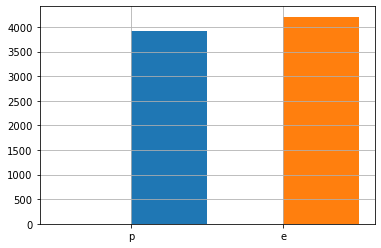

In [6]:
edible = df[df["class"] == "e"]["class"]
poisonous = df[df["class"] == "p"]["class"]

print("Number of edible class:", edible.shape[0])
print("Number of poisonous class:", poisonous.shape[0])
binsNumber = 2

poisonous.hist(bins=binsNumber)
edible.hist(bins=binsNumber)

In [7]:
df = df.drop(["veil-type"], axis=1)
print(df.shape)

(8124, 22)


### 5.Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary')
X = df.to_numpy()
enc.fit(X)
X = enc.transform(X).toarray()
print(X.shape)

(8124, 112)


### 6.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

[[ 1.         -0.18256669  0.02300745 ...  0.32334579  0.11207815
  -0.15008688]
 [-0.18256669  1.         -0.00538725 ... -0.0951776  -0.05287129
  -0.03776367]
 [ 0.02300745 -0.00538725  1.         ... -0.0089854  -0.00483456
  -0.00345312]
 ...
 [ 0.32334579 -0.0951776  -0.0089854  ...  1.         -0.0881841
  -0.06298608]
 [ 0.11207815 -0.05287129 -0.00483456 ... -0.0881841   1.
  -0.03388943]
 [-0.15008688 -0.03776367 -0.00345312 ... -0.06298608 -0.03388943
   1.        ]]


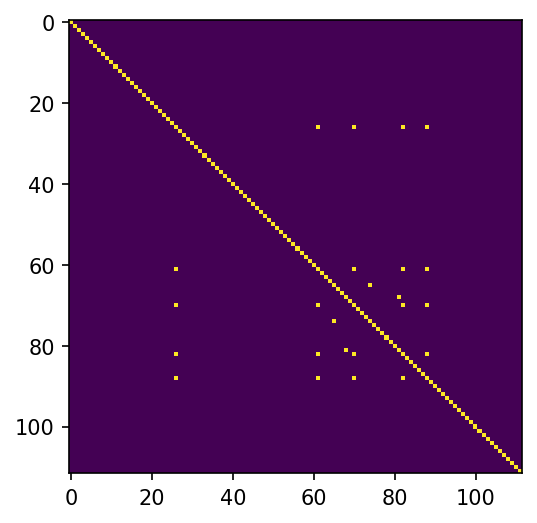

In [9]:
C = np.corrcoef(X.T)
print(C)
C = np.abs(C) > 0.99
plt.figure(dpi=150)
plt.imshow(C)
plt.show()

### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Оцените качество работы классификатора

In [10]:
np.random.seed(123)
np.random.shuffle(X)
Y = X[:,0]
X = X[:,1:]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1000, random_state=5)

### 8. 1) Классификатор "K ближайших соседей" (задаётся радиус для выбора ближайших объектов).

In [11]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import GridSearchCV
classifier = RadiusNeighborsClassifier()
print(classifier.get_params())

parameters = {
    "p": [1, 2],
    "weights": ["uniform", "distance"],
    "radius": [2, 3, 4, 5, 6, 7]
}

gridSearch = GridSearchCV(classifier, parameters, n_jobs=4)

gridSearch.fit(X_train, Y_train)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'outlier_label': None, 'p': 2, 'radius': 1.0, 'weights': 'uniform'}


GridSearchCV(estimator=RadiusNeighborsClassifier(), n_jobs=4,
             param_grid={'p': [1, 2], 'radius': [2, 3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']})

In [12]:
print(gridSearch.best_params_)

cvResults = pd.DataFrame(gridSearch.cv_results_)
cvResults[["param_p", "param_radius", "param_weights", "mean_test_score"]]

{'p': 1, 'radius': 2, 'weights': 'uniform'}


,param_p,param_radius,param_weights,mean_test_score
0,1,2,uniform,1.000000
1,1,2,distance,1.000000
2,1,3,uniform,1.000000
3,1,3,distance,1.000000
4,1,4,uniform,1.000000
5,1,4,distance,1.000000
6,1,5,uniform,1.000000
7,1,5,distance,1.000000
8,1,6,uniform,1.000000
9,1,6,distance,1.000000


In [13]:
classifier_good = RadiusNeighborsClassifier(radius=3, p=2, weights='uniform')
classifier_good.fit(X_train, Y_train)
Y_predicted_good = classifier_good.predict_proba(X_test)


classifier_bad = RadiusNeighborsClassifier(radius=5, p=2, weights='distance')
classifier_bad.fit(X_train, Y_train)
Y_predicted_bad = classifier_bad.predict_proba(X_test)

Good average precision: 1.0 recall: 1.0
Bad average precision: 0.96 recall: 0.73


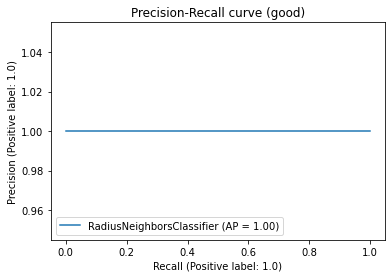

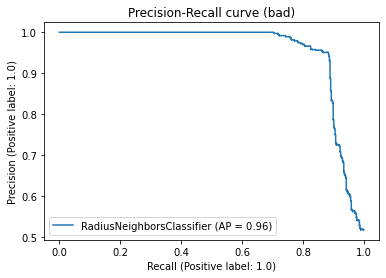

In [14]:
from sklearn.metrics import plot_precision_recall_curve, average_precision_score, recall_score


disp_good = plot_precision_recall_curve(classifier_good, X_test, Y_test)
disp_bad = plot_precision_recall_curve(classifier_bad, X_test, Y_test)
disp_good.ax_.set_title('Precision-Recall curve (good)')
disp_bad.ax_.set_title('Precision-Recall curve (bad)')


average_precision_good = average_precision_score(Y_test, Y_predicted_good[:,1])
average_precision_bad = average_precision_score(Y_test, Y_predicted_bad[:,1])
recall_good = recall_score(Y_test, np.around(Y_predicted_good[:,1]))
recall_bad = recall_score(Y_test, np.around(Y_predicted_bad[:,1]))

print("Good average precision:", average_precision_good, "recall:", recall_good)
print("Bad average precision:", round(average_precision_bad, 2), "recall:", round(recall_bad, 2))

### 8. 2) Дерево решений (бинарное решающее дерево)

In [15]:
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier()

print(treeClassifier.get_params())

parameters = {
    "max_depth": [4, 5, 6, 7, 8, 9, 10, 15],
    "max_features": [50, 90, 111],
    "min_samples_leaf": [1, 5, 10, 100]
}

gridSearchTree = GridSearchCV(treeClassifier, parameters, n_jobs=4)
gridSearchTree.fit(X_train, Y_train)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 15],
                         'max_features': [50, 90, 111],
                         'min_samples_leaf': [1, 5, 10, 100]})

In [16]:
print(gridSearchTree.best_params_)

cvResults = pd.DataFrame(gridSearchTree.cv_results_)
cvResults[["param_max_depth", "param_max_features", "param_min_samples_leaf", "mean_test_score"]]

{'max_depth': 6, 'max_features': 111, 'min_samples_leaf': 5}


,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,4,50,1,0.976693
1,4,50,5,0.977683
2,4,50,10,0.979504
3,4,50,100,0.967996
4,4,90,1,0.990034
...,...,...,...,...
91,15,90,100,0.973331
92,15,111,1,1.000000
93,15,111,5,1.000000
94,15,111,10,0.998737


In [17]:
tree_classifier_good = DecisionTreeClassifier(max_depth=6, max_features=90, min_samples_leaf=5)
tree_classifier_good.fit(X_train, Y_train)
tree_Y_predicted_good = tree_classifier_good.predict_proba(X_test)

tree_classifier_bad = DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_leaf=50)
tree_classifier_bad.fit(X_train, Y_train)
tree_Y_predicted_bad = tree_classifier_bad.predict_proba(X_test)

[Text(697.5, 830.5, 'X[26] <= 0.5\ngini = 0.499\nsamples = 7124\nvalue = [3695, 3429]'),
 Text(380.45454545454544, 679.5, 'X[21] <= 0.5\ngini = 0.289\nsamples = 4029\nvalue = [705, 3324]'),
 Text(253.63636363636363, 528.5, 'X[24] <= 0.5\ngini = 0.172\nsamples = 3674\nvalue = [350, 3324]'),
 Text(126.81818181818181, 377.5, 'gini = 0.0\nsamples = 3324\nvalue = [0, 3324]'),
 Text(380.45454545454544, 377.5, 'gini = 0.0\nsamples = 350\nvalue = [350, 0]'),
 Text(507.27272727272725, 528.5, 'gini = 0.0\nsamples = 355\nvalue = [355, 0]'),
 Text(1014.5454545454545, 679.5, 'X[94] <= 0.5\ngini = 0.066\nsamples = 3095\nvalue = [2990, 105]'),
 Text(887.7272727272727, 528.5, 'X[58] <= 0.5\ngini = 0.027\nsamples = 3032\nvalue = [2990, 42]'),
 Text(634.090909090909, 377.5, 'X[32] <= 0.5\ngini = 0.005\nsamples = 2984\nvalue = [2976, 8]'),
 Text(507.27272727272725, 226.5, 'gini = 0.0\nsamples = 2807\nvalue = [2807, 0]'),
 Text(760.9090909090909, 226.5, 'X[20] <= 0.5\ngini = 0.086\nsamples = 177\nvalue = 

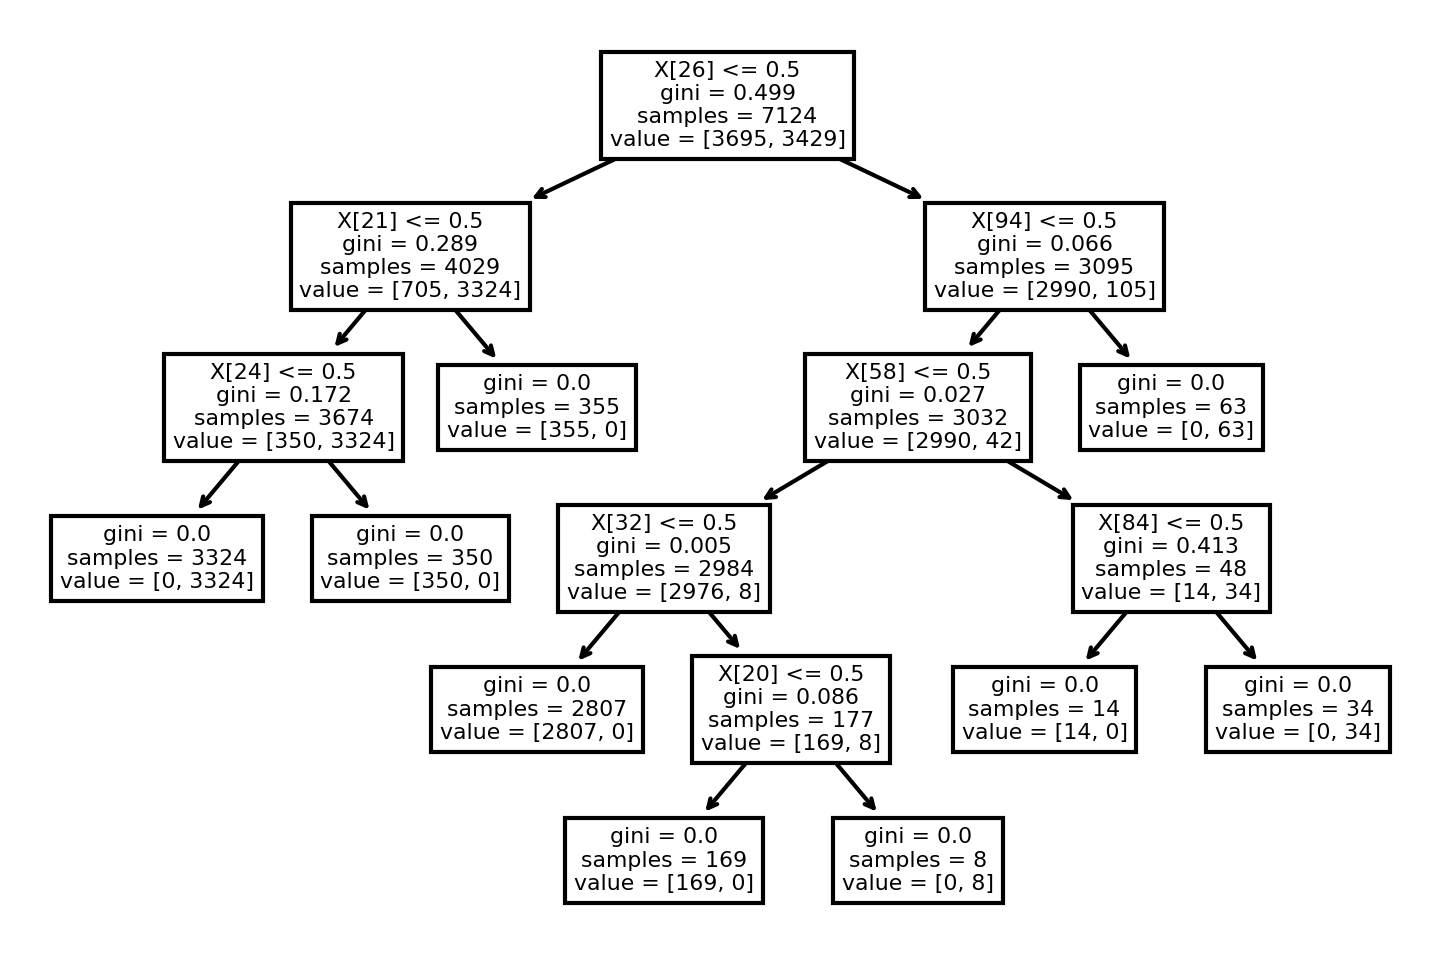

In [18]:
from sklearn import tree
plt.figure(dpi=300)
tree.plot_tree(tree_classifier_good)

Good average precision: 1.0 recall: 1.0
Bad average precision: 0.77 recall: 0.54


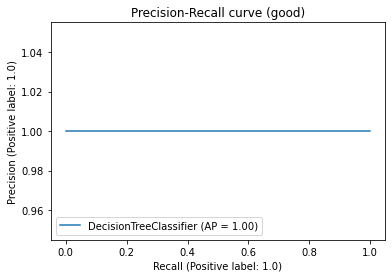

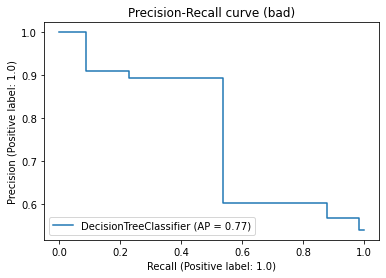

In [19]:
from sklearn.metrics import plot_precision_recall_curve, average_precision_score, recall_score


disp_good = plot_precision_recall_curve(tree_classifier_good, X_test, Y_test)
disp_bad = plot_precision_recall_curve(tree_classifier_bad, X_test, Y_test)
disp_good.ax_.set_title('Precision-Recall curve (good)')
disp_bad.ax_.set_title('Precision-Recall curve (bad)')


average_precision_good = average_precision_score(Y_test, tree_Y_predicted_good[:,1])
average_precision_bad = average_precision_score(Y_test, tree_Y_predicted_bad[:,1])
recall_good = recall_score(Y_test, np.around(tree_Y_predicted_good[:,1]))
recall_bad = recall_score(Y_test, np.around(tree_Y_predicted_bad[:,1]))

print("Good average precision:", average_precision_good, "recall:", recall_good)
print("Bad average precision:", round(average_precision_bad, 2), "recall:", round(recall_bad, 2))
